In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import path
%matplotlib inline

In [105]:
# Read data
data = pd.read_csv('Task4DataSet/02_train.csv')

In [120]:
def clean_data(data):
    new_data = []
    data = np.array(data.T)
    for row in data:
        if row.max() == row.min():
            continue
        else:
            new_data.append(row)
    
    new_data = pd.DataFrame(new_data).T
    return new_data

In [121]:
data = clean_data(data)

In [124]:
test_data = pd.read_csv('Task4DataSet/02_test.csv')
test_data = clean_data(test_data)

In [125]:
# # Normalize the data
# def norm(x):
#     return (x - np.mean(x)) / np.std(x)

# data = data.apply(norm, axis=0)
data = data.dropna(axis=1, how='all')
# test_data = test_data.apply(norm, axis=0)
test_data = test_data.dropna(axis=0, how='all')

In [126]:
def normalize(data):
    data = data.T
    data = np.array(data)
    mean_std = {'mean': [],
                'std': [] }
    normalized_data = []
    for values in data:
        normalized_data.append((values - np.mean(values)) /np.std(values))
        mean_std['mean'].append(np.mean(values))
        mean_std['std'].append(np.std(values))
    
    normalized_data = pd.DataFrame(normalized_data)
    return normalized_data.T, mean_std

        
        

In [127]:
# def normalize_with_mean_and_std(data, mean_std_dict):
#     data = data.T
#     data = np.array(data)
#     print(data.shape, len(mean_std_dict['mean']))
#     normalized_data = []
#     for i,values in enumerate(data):
#         normalized_data.append( (values - mean_std_dict['mean'][i]) / mean_std_dict['std'][i])
    
#     normalized_data = pd.DataFrame(normalized_data)
#     return normalized_data.T
    

In [128]:
data , std= normalize(data)

In [129]:
len(std['mean'])

219

In [130]:
# test_data = normalize_with_mean_and_std(test_data, std)

In [131]:
data = data.dropna(axis=1, how='all')
test_data = data.dropna(axis=1, how='all')
test_data.insert(loc=0,column='1',value=np.ones(len(test_data))) 

In [132]:
print(test_data.shape)

(4418, 220)


In [133]:
print(data.shape)

(4418, 219)


In [134]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,216,217,218
0,-0.579714,-0.077113,-1.633070,-1.110431,0.581960,1.523532,-0.394176,1.382873,-1.332836,1.022412,...,1.162597,-0.074094,0.397552,1.454982,0.801484,0.681071,-0.895976,0.653857,-1.151957,-3.480289
1,1.030099,-0.289189,-1.939341,-0.931570,-0.666981,-0.227407,-0.011038,0.657749,-1.102381,-0.174019,...,-0.924464,-2.820143,1.946153,0.773023,-0.079000,-0.330729,1.543295,-1.260569,0.791686,-3.418385
2,-1.529432,1.874766,0.492129,-0.286621,-0.574553,-0.337271,0.083922,0.728985,1.344128,0.621395,...,1.097844,0.254771,0.442206,-0.065230,0.782832,0.881815,-1.441829,-0.169698,0.711008,-3.291954
3,0.916160,0.102234,-0.416609,1.079818,-1.156138,0.406795,-1.879076,-1.500190,-0.272538,-1.224160,...,0.595225,-1.160920,-0.060582,-0.393548,0.578735,0.264808,1.182424,-1.162125,2.411121,-3.229124
4,1.512003,-0.988369,0.116380,-0.651220,0.184436,-0.191325,-0.776060,-0.153408,-0.821160,-0.292016,...,-0.812206,-2.335458,-0.132038,0.151737,0.053897,0.725083,-1.402549,-2.765511,0.353703,-3.053837


In [135]:
data.insert(loc=0,column='x_0_1',value=np.ones(len(data))) 

In [136]:
data.head(5)

,x_0_1,0,1,2,3,4,5,6,7,8,...,209,210,211,212,213,214,215,216,217,218
0,1.0,-0.579714,-0.077113,-1.633070,-1.110431,0.581960,1.523532,-0.394176,1.382873,-1.332836,...,1.162597,-0.074094,0.397552,1.454982,0.801484,0.681071,-0.895976,0.653857,-1.151957,-3.480289
1,1.0,1.030099,-0.289189,-1.939341,-0.931570,-0.666981,-0.227407,-0.011038,0.657749,-1.102381,...,-0.924464,-2.820143,1.946153,0.773023,-0.079000,-0.330729,1.543295,-1.260569,0.791686,-3.418385
2,1.0,-1.529432,1.874766,0.492129,-0.286621,-0.574553,-0.337271,0.083922,0.728985,1.344128,...,1.097844,0.254771,0.442206,-0.065230,0.782832,0.881815,-1.441829,-0.169698,0.711008,-3.291954
3,1.0,0.916160,0.102234,-0.416609,1.079818,-1.156138,0.406795,-1.879076,-1.500190,-0.272538,...,0.595225,-1.160920,-0.060582,-0.393548,0.578735,0.264808,1.182424,-1.162125,2.411121,-3.229124
4,1.0,1.512003,-0.988369,0.116380,-0.651220,0.184436,-0.191325,-0.776060,-0.153408,-0.821160,...,-0.812206,-2.335458,-0.132038,0.151737,0.053897,0.725083,-1.402549,-2.765511,0.353703,-3.053837


In [137]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [138]:
X_test = test_data.iloc[:, :-1]
Y_test = test_data.iloc[:,-1]

In [139]:
# Generating Coefficients
B = np.zeros(len(X.columns))
print(B)
X = np.array(X)
Y = np.array(Y)
print(X.dtype)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
float64


In [140]:
# HyperParameters 
learning_rate = 0.01
regularization_parameter = 1e-15 # 0.01

In [141]:
# Defining Cost function
cost_function = lambda X,Y,B: np.sum(np.square(X.dot(B) - Y)) / (2.0 * len(Y))

In [142]:
initial_cost = cost_function(X,Y,B)
print(initial_cost)

0.5


In [143]:
# Writing Gradient Descent with L2 Ridge Regularization

def gradient_descent(X, Y, B, learning_rate, epochs,regularization_parameter):
    
    cost_history = []
    size = len(Y)
    for i in range(epochs):
        h = X.dot(B)
        loss = h - Y  - ( regularization_parameter / (2 * size) ) * np.sum(np.square(B))
        gradient = X.T.dot(loss) / size
        B = B - learning_rate * gradient# Lasso Regression - regularization_parameter*np.sign(B)
        # B[B < 1e-16] = 0     when lasso regression
        cost = cost_function(X,Y,B)
        if i % 10 == 0:
            cost_history.append(cost)
  
    return B, cost_history
    

In [144]:
X.shape, Y.shape, B.shape

((4418, 219), (4418,), (219,))

In [145]:
newB, cost_history = gradient_descent(X, Y, B, learning_rate, 1000, regularization_parameter)

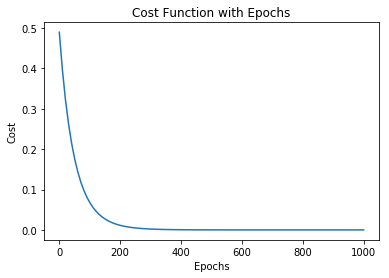

In [146]:
a = np.linspace(0,1000,100)
plt.plot(a, cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function with Epochs')
plt.show()

In [147]:
def predict(X, B ,std):
    X = np.array(X)
    new_X = []
    for i in range(len(X.T)):
        if i == 0:
            new_X.append(X[:, i])
        else:
            try:
                new_X.append( (X[ :,i] - std['mean'][i-1]) / std['std'][i-1] )
            except:
                print(i)
        
    new_X = np.array(new_X).T
    return new_X.dot(B)

In [148]:
def rmse(Y, Y_pred):
    s = np.array(Y - Y_pred)
    s = np.array(s**2)
    s = np.sum(s)/ len(Y)
    return s

In [149]:
X_test.shape

(4418, 219)

In [150]:
Y_pred = predict(X_test, newB, std)

In [151]:
print(rmse(Y_test, Y_pred))

1.303528942441008


Alternate Method

In [152]:
def method_of_regularized_least_squares(X_, Y_):
    # Regularized Least Squares
    L = 0.1
    CX = X_.T.dot(X_)
    B_ = (np.linalg.inv(CX + L * np.identity(len(CX)))).dot(X_.T.dot(Y_))

    return B_

In [153]:
B = method_of_regularized_least_squares(X, Y)

In [154]:
Y_pred = X_test.dot(B)

In [155]:
print(rmse(Y_test, Y_pred))

5.792340740989087e-06
